# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import arange
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Load Data

In [4]:
((X_train, Y_train),(X_test,Y_test)) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

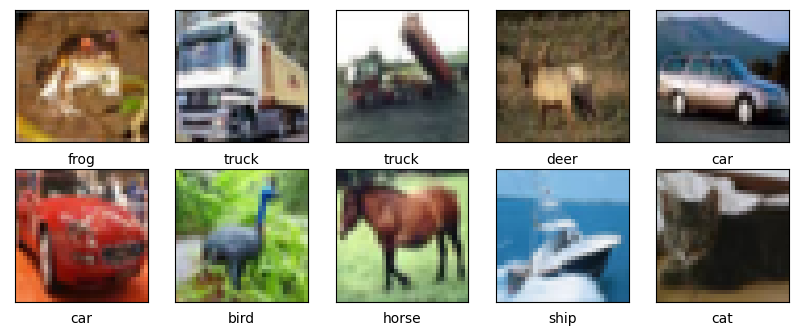

In [7]:
class_names = ["plane","car","bird","cat","deer","dog","frog","horse","ship","truck"]

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

# Build and Train Model

In [9]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (2,2), activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.compile(loss=SparseCategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 32)          4128      
                                                                 
 flatten_1 (Flatten)         (None, 288)              

In [11]:
e = 4
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=e, batch_size=128)

Epoch 1/4
391/391 [==============================] - 24s 60ms/step - loss: 2.1204 - accuracy: 0.2074 - val_loss: 1.7608 - val_accuracy: 0.3436
Epoch 2/4
391/391 [==============================] - 26s 66ms/step - loss: 1.6147 - accuracy: 0.4139 - val_loss: 1.4824 - val_accuracy: 0.4609
Epoch 3/4
391/391 [==============================] - 26s 67ms/step - loss: 1.4058 - accuracy: 0.4960 - val_loss: 1.3391 - val_accuracy: 0.5192
Epoch 4/4
391/391 [==============================] - 27s 70ms/step - loss: 1.3215 - accuracy: 0.5260 - val_loss: 1.3271 - val_accuracy: 0.5215


In [12]:
Y_pred = model.predict(X_test, batch_size=128)

79/79 [==============================] - 1s 12ms/step


In [13]:
Y_pred

array([[1.4529043e-02, 1.8508504e-03, 4.8258014e-02, ..., 1.0427486e-02,
        3.8306437e-02, 2.1739779e-03],
       [1.5790896e-01, 1.9224325e-01, 3.8083477e-03, ..., 7.2167668e-04,
        5.8172971e-01, 5.6305557e-02],
       [9.5499285e-02, 1.3071694e-02, 6.7381323e-03, ..., 9.9640945e-04,
        8.6757380e-01, 9.3035186e-03],
       ...,
       [3.5319887e-03, 1.3670938e-03, 5.1758073e-02, ..., 4.5914665e-02,
        4.2820740e-03, 4.2758998e-03],
       [1.3309623e-01, 1.8587923e-01, 3.6109172e-02, ..., 4.0511813e-02,
        1.0689123e-02, 1.2803378e-02],
       [1.7346956e-03, 8.9839054e-04, 1.5599589e-02, ..., 8.5096008e-01,
        4.0981884e-04, 2.7804258e-03]], dtype=float32)

In [14]:
Y_pred.shape

(10000, 10)

In [15]:
Y_test.shape

(10000, 1)

In [16]:
predictions=[]
for i in range(0, Y_pred.shape[0]):
        predictions.append(pd.Series(Y_pred[i]).idxmax())
predictions

[3,
 8,
 8,
 8,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 3,
 7,
 9,
 6,
 5,
 3,
 8,
 6,
 7,
 0,
 0,
 9,
 2,
 6,
 6,
 7,
 1,
 6,
 6,
 5,
 2,
 5,
 9,
 6,
 5,
 1,
 9,
 5,
 9,
 6,
 7,
 6,
 0,
 0,
 3,
 7,
 4,
 6,
 9,
 8,
 6,
 3,
 8,
 8,
 7,
 8,
 3,
 3,
 6,
 5,
 6,
 2,
 6,
 6,
 1,
 0,
 3,
 7,
 0,
 6,
 8,
 8,
 9,
 2,
 8,
 3,
 5,
 8,
 8,
 1,
 1,
 5,
 2,
 7,
 2,
 2,
 9,
 9,
 0,
 6,
 8,
 6,
 7,
 6,
 6,
 0,
 3,
 7,
 5,
 6,
 6,
 3,
 1,
 1,
 2,
 6,
 5,
 5,
 6,
 0,
 2,
 2,
 9,
 6,
 0,
 3,
 5,
 5,
 8,
 5,
 1,
 2,
 8,
 9,
 8,
 3,
 6,
 6,
 4,
 1,
 8,
 9,
 9,
 3,
 9,
 7,
 6,
 8,
 6,
 5,
 6,
 5,
 8,
 3,
 5,
 5,
 6,
 3,
 0,
 9,
 6,
 1,
 0,
 5,
 3,
 1,
 3,
 0,
 2,
 1,
 6,
 6,
 8,
 7,
 8,
 6,
 9,
 0,
 9,
 9,
 1,
 8,
 9,
 9,
 3,
 6,
 3,
 9,
 9,
 5,
 6,
 3,
 6,
 8,
 6,
 3,
 5,
 8,
 5,
 8,
 6,
 6,
 7,
 4,
 8,
 3,
 3,
 8,
 3,
 8,
 8,
 7,
 1,
 3,
 8,
 5,
 6,
 8,
 5,
 9,
 3,
 9,
 8,
 3,
 7,
 9,
 8,
 4,
 6,
 3,
 9,
 5,
 5,
 9,
 3,
 6,
 3,
 6,
 5,
 1,
 3,
 1,
 8,
 0,
 6,
 9,
 3,
 3,
 1,
 1,
 8,
 5,
 0,
 6,
 1,
 8,
 4,
 8,


In [17]:
val=[]
for i in range(0, Y_test.shape[0]):
    val.append(Y_test[i][0])
val

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 5,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 5,
 2,
 4,
 0,
 9,
 6,
 6,
 5,
 4,
 5,
 9,
 2,
 4,
 1,
 9,
 5,
 4,
 6,
 5,
 6,
 0,
 9,
 3,
 9,
 7,
 6,
 9,
 8,
 0,
 3,
 8,
 8,
 7,
 7,
 4,
 6,
 7,
 3,
 6,
 3,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 9,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 5,
 2,
 7,
 8,
 9,
 0,
 3,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 3,
 6,
 8,
 7,
 4,
 0,
 6,
 2,
 1,
 3,
 0,
 4,
 2,
 7,
 8,
 3,
 1,
 2,
 8,
 0,
 8,
 3,
 5,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 9,
 6,
 5,
 6,
 3,
 8,
 7,
 6,
 2,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 5,
 4,
 2,
 1,
 6,
 6,
 8,
 4,
 8,
 4,
 5,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 5,
 0,
 0,
 5,
 2,
 2,
 3,
 8,
 6,
 3,
 4,
 0,
 5,
 8,
 0,
 1,
 7,
 2,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 7,
 4,
 5,
 9,
 8,
 0,
 7,
 9,
 8,
 2,
 7,
 6,
 9,
 4,
 3,
 9,
 6,
 4,
 7,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 0,
 5,
 5,
 1,
 1,
 8,
 9,
 0,
 3,
 1,
 9,
 2,
 2,


In [18]:
print(classification_report(val, predictions))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58      1000
           1       0.64      0.74      0.69      1000
           2       0.48      0.22      0.30      1000
           3       0.34      0.42      0.37      1000
           4       0.48      0.22      0.30      1000
           5       0.38      0.49      0.43      1000
           6       0.43      0.81      0.56      1000
           7       0.70      0.50      0.58      1000
           8       0.65      0.70      0.67      1000
           9       0.65      0.60      0.63      1000

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.51     10000



# Plot Training Loss and Accuracy

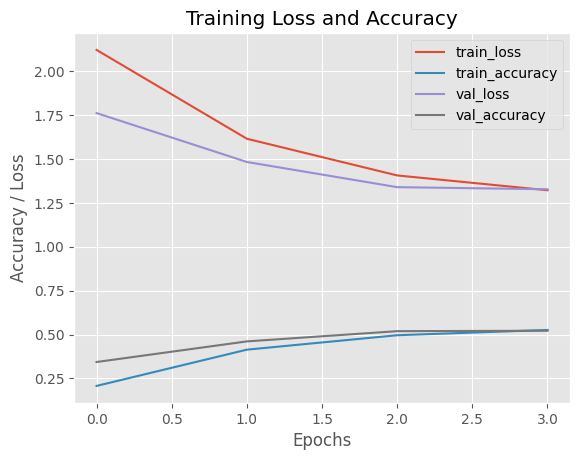

In [19]:
plt.style.use("ggplot")
plt.plot(arange(0,e), H.history["loss"], label="train_loss")
plt.plot(arange(0,e), H.history["accuracy"], label="train_accuracy")
plt.plot(arange(0,e), H.history["val_loss"], label="val_loss")
plt.plot(arange(0,e), H.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy / Loss")
plt.title("Training Loss and Accuracy")
plt.legend()